<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Ольга! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты и сразу увидеть исправленное. <br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что у нас получилось!</b></font>

# *Исследование продаж компьютерных игр*
___

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! Хорошее описание проекта. 👍</font>

P.S. При первичном открытии почему - то на первом графике из seaborn ячейки дальше не запускаются, помогает Kernel - Restart n Run All :(

### *Откройте файл с данными и изучите общую информацию*
___

Импортируем все библиотеки, которые понадобятся в ходе работы и зададим комфортные параметры для отображения

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format
pd.options.mode.chained_assignment = None

In [3]:
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
print('Описательная статистика:')
games.describe()

Описательная статистика:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


In [5]:
print('Информация о датафрейме:')
games.info()

Информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
print('Пропущенные значения:')
games.isna().sum()

Пропущенные значения:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
print('Дубликаты:')
print(games.duplicated().sum())

Дубликаты:
0


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены дубликаты, некоторые студенты забывают это сделать. 😊</font>

Краткий итог: всего 16715 записей, есть некорректные типы данных и пропуски, а также названия столбцов не в общепринятом нижнем регистре.

Как будем исправлять? На мой взгляд, нужно сделать следующее:

Типы данных:
- Год выпуска игр: Year_of_Release - приведём к int, дробные значения нам ни к чему
- Оценка пользователей: User_Score - приведём к float (сейчас - object - значит, в поле есть нечисловые значения)

Пропуски:
- Название игры: Name - пропущено 2 значения. Посмотрим на записи и решим, что с ними делать.
- Год выпуска: Year_of_Release - пропущен 269 раз. Есть два варианта - найти информацию самостоятельно и заполнить (трудоёмко и времязатратно) или заполнить маркером для фильтрации в дальнейшем - на этом и остановимся
- Оценка критиков: Critic_Score - отсутствует по 8578 играм (почти половина)
- Оценка пользователей: User_Score - отсутствует по 6701 играм
- Рейтинг от организации - ESRB Rating не проставлен по 6766 играм

С рейтингами труднее, предварительно - оставим, как есть.

### *Подготовьте данные*
___

#### Замените названия столбцов (приведите к нижнему регистру)

In [8]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍 Не которые пишут длинный словарь для замены колонок.</font>

Перевели в нижний регистр, теперь тут всё хорошо

#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

Изменим тип данных поля 'year_of_release' на int и удалим строки, в которых нет данных. Чисто теоретически можно было бы всё это вручную собрать из интернета - но больно уж затратно по времени, кажется, что так тоже приемлимо (пропусков немного)

In [9]:
games = games.dropna(subset=['year_of_release'])
games['year_of_release'] = games['year_of_release'].astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


<font color='DarkOrange'><b>Комментарий студента</b></font><br>
Удалили строки, в которых год не указан

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Почему удаляем год релиза и когда, что удалять. В реальности все зависит от поставленной задачи на исследование. В данном проекте необходимо определить актуальный период, на основании которого мы и будем делать прогнозы на 2017 год. Соответственно, мы все равно будем сокращать датасет, фильтруя по году релиза. А можно провести анализ, сколько пропусков года релиза приходится на платформы, которые например к 2000 году уже вышли с рынка, то есть для прогноза на 2017 год мы их явно учитывать не будем.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 А зачем нам заглушка на значения года выпуска игр? Весь анализ строится на динамике по годам. Мы будем определять актуальный период, который и исследовать. Надо принять правильное решение. Удалить напрочь.</font>

<font color='DarkBlue'><b>Комментарий ревьюера: Глоссарий</b></font><br>
<font color='DarkGreen'>👌 В контексте анализа и предобработки датасета часто используютется термин: <b>Заглушка</b>. <br>Из словаря: "Заглушка — приспособление для закрывания отверстия наглухо." <br>В нашем контексте закрытие пропуска в датасете каким-то значением, совпадающим по типу с данными колонки таблицы. Как правило, для числовых данных заглушка должна быть вне диапазона значений колонки. При анализе по данной колонке заглушка или фильтруется, или включается в анализ, если сам пропуск не является ошибкой сбора данных и несет какой-то признак. <br>Частая ошибка, когда заглушке присваивается числовое значение, например `0`, а в данных колонки присутствуют значения `'0'`, то при преобразовании к числовому типу произойдет слияние значимых данных таблицы и заглушки.</font>

Тип изменён успешно. Посмотрим на пропуски

In [10]:
games.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

И здесь всё хорошо - пропуски устранены. Теперь разберёмся, что с нечисловыми значениямя в поле 'user_score'

In [11]:
games['user_score'].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Кроме понятного nan, попадаются ещё 'tbd' - неизвестное мне доселе значение. Проведя увлекательное путешествие в глубины интернета, наткнулась на то, что это аббревиатура от To Be Determined. Проставляется при недостаточном количество отзывов. Суть нам не сильно важна - необходим был лишь ответ, чем заполнить данные значения для приведения к нужному типу - фактически 'tbd' для нас является является nan - заменим и значения, и тип.

In [12]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float32') 

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN. Это практически аналог пропусков.</font>

Проверим результат

In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float32
 10  rating           9768 non-null   object 
dtypes: float32(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


Посмотрим на пропуски

In [14]:
games.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

Краткий итог: привели в порядок названия столбцов, привели типы столбцов к корректным, попутно заполнив пропуски маркером - а также разобрались с изначально загадочным 'tbd' - считаем успехом, продолжаем предобработку!

#### Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [15]:
games.isnull().sum().sort_values(ascending = False) / games.shape[0] * 100

user_score        54.62
critic_score      51.46
rating            40.61
name               0.01
genre              0.01
platform           0.00
year_of_release    0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
dtype: float64

Посмотрим внимательнее на столбец 'name' - да, там всего два пропуска, но, возможно, их можно обработать

In [16]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропущен жанр и все оценки, такие записи нам не пригодятся - и их ничтожно мало - просто удалим их.

In [17]:
games = games.dropna(subset=['name'])

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что удалили пропуски в названии игр, тем более в этих строках еще хватает пропусков по другим колонкам.</font>

Посмотрим на результат - и в целом на оставшиеся пропуски

In [18]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Выглядит, конечно, не очень - но заполнять средним или медианным значениями нельзя - слишком повлияет на результаты анализа / просто некорректно. Заполним их маркерами - другие данные валидны и вполне себе годятся для аналитических делишек!

Природа пропусков может быть объяснена рядом причин:
- critic_score: оценка критиков - вполне возможно, что игры просто не оценивались критиками - или не было удобных сервисов для выставления оценок (это в наше время всё измеряется количеством "классов" в Одноклассниках и том же Steam). Заполним значением -1, не 0 (избежав тем самым смешения реальных нулевых рейтингов с nan);
- user_score: оценка игроков - аналогично. Заполняем значением -1.
- rating: рейтинг от ESRB - возможно, данной организации не существовало в принципе или она проставляла рейтинг далеко не всем выходящим играм. Средним и медианным заполнять - некорректно даже с поправкой на жанр. Заполним значением "no data".

In [19]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)
games['rating'] = games['rating'].fillna('no data')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍Поставили заглушки на отзывы, главное потом при анализе их отфильтровывать.</font><br>
<font color='DarkMagenta'>👉 Правильно поставлена заглушка на пропуски в колонке рейтинга. А если посмотреть в интернете, что такое рейтинг ESRB, то мы узнаем, что это рейтинг для США и Канады. А значит пропуск не савязан с ошибкой заполнения данных, просто не только для Северной Америки выпускаются игры.</font>

Не продоем пропуски, а показываем

In [20]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Кросивое!

#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Посчитаем количество продаж во всех регионах суммой соответствующих столбцов и запишем в отдельный стоблец 'total_sales'. Проверим результат.

In [21]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.00,-1.00,no data,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.00,-1.00,no data,31.38


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Мы молодцы, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
` = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)`

С предобработкой завершено. Подведём итоги:
- названия столбцов приведены к нижнему регистру
- пропуски устранены
- маркеры для корректной фильтрации невалидных данных добавлены
- посчитаны продажи в регионах
- довольна, как кот на солнышке

In [22]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float32
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float32(1), float64(6), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en 

### *Проведите исследовательский анализ данных*
___

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

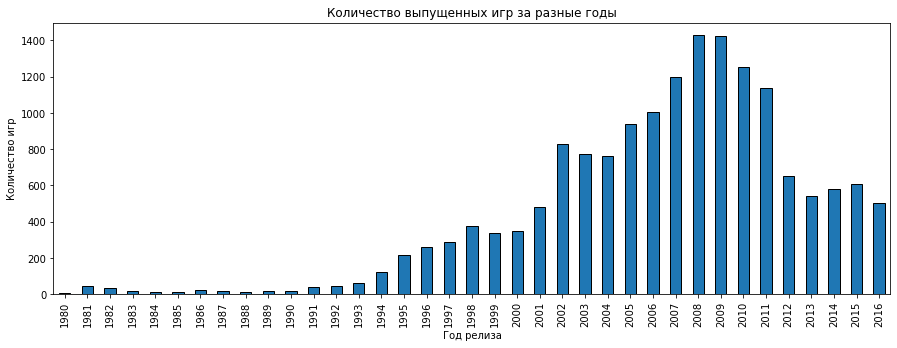

In [23]:
# соберем отдельный датафрейм с отфильтрованными значениями
# посчитаем количество
# и построим график
df_to_plot = games.groupby('year_of_release')['year_of_release']
df_to_plot_calculated = df_to_plot.count()
figsize = (15,5)
plot = df_to_plot_calculated.plot(kind='bar',
                                  y='year_of_release',
                                  figsize=figsize,
                                  ec='black',
                                  title='Количество выпущенных игр за разные годы',
                                  xlabel='Год релиза',
                                  ylabel='Количество игр')

<font color='DarkOrange'><b>Комментарий студента</b></font><br>
Фильтрация убрана (данные удалили выше), название графика и осей - добавлены!

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br><font color='DarkGreen'>👌 Красивые и информативные графики всегда приветствуются, особенно когда на них есть все подписи осей, названия меток и название графика. В презентацию реального проекта в основном идут именно скрины графиков, таблицы мало информативны. По этому лучше сразу графики максимально описывать.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация. 👍</font><br>
<font color='DarkMagenta'>👉 А вот подписи по оси Y и названия графика  явно не хватает. Это относится и к некоторым другим графикам проекта. И стоило ставить заглушку на год релиза если мы все равно ее фильтруем?</font>

- До 1995 года игр выходило мало - не было консолей, играли в основном на игровых автоматах
- В 1995 - 2000 г. количество новых игр растёт - начали появляться консоли 
- В 2002 - 2005 г. рост ускоряется и достигает пика в 2008 - 2009 годах - расцвет эры консолей, популяризация игр, начало повсеместной компьютеризации
- В 2007 - 2011 г. наблюдается максимальное количество игр, также присутствует небольшой всплеск в 2015 г.
- Дальнейший спад относительно объясняется развитием мобильных устройств и популяризацией социальных сетей

Ранние года не интересны для анализа. Более интересно изучать период с 2008 года

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [24]:
# выберем платформы с наибольшими продажами
(games.groupby('platform')
      .agg({'total_sales': 'sum'})
      .sort_values(by='total_sales', ascending=False)
      .head(10))

,total_sales
platform,
PS2,"1,233.56"
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


- Безусловным лидером является платформа PS2.
- Далее идут Xbox360, PS3 и Wii.
- Начиная с 7-й позиции продажи резко падают - для анализа возьмём только первые 6 платформ
- Значительная часть проданных игр - на старые консоли, что и логично

Построим шесть графиков для платформ - лидеров продаж и проанализируем их

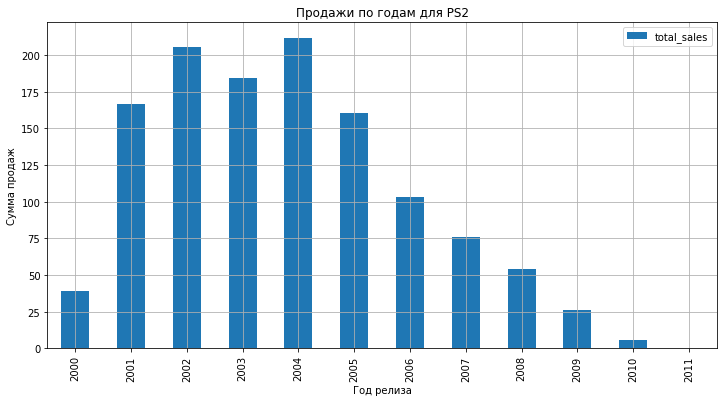

In [25]:
ps2 = games.query('platform == "PS2"').groupby('year_of_release').agg({'total_sales': 'sum'})
ps2.plot(kind='bar', title='Продажи по годам для PS2', xlabel='Год релиза', ylabel='Сумма продаж', figsize=(12,6), grid=True)
plt.show()

Время жизни PS2 - с 2000 до 2011 года - но там почти изжила себя -  10 лет

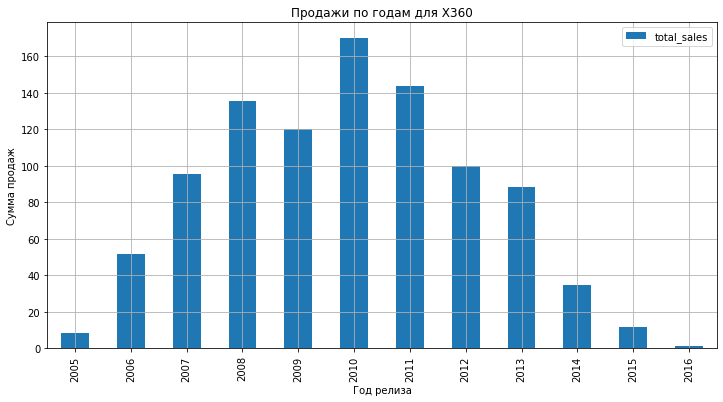

In [26]:
x360 = games.query('platform == "X360"').groupby('year_of_release').agg({'total_sales': 'sum'})
x360.plot(kind='bar', title='Продажи по годам для X360', xlabel='Год релиза', ylabel='Сумма продаж', figsize=(12,6), grid=True)
plt.show()

Время жизни X360 - с 2005 и по сей день - но основная популярность - 11 лет

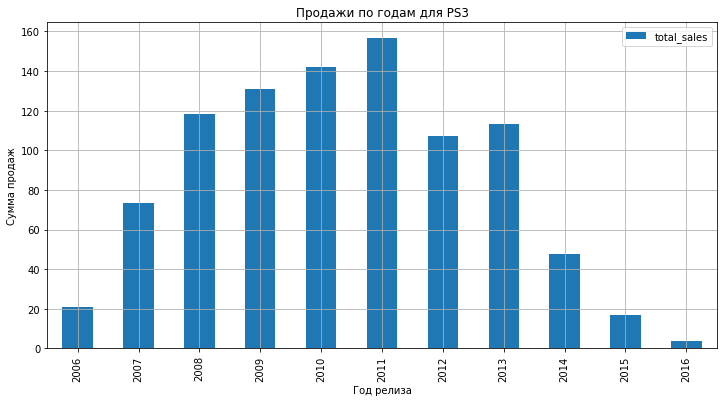

In [27]:
ps3 = games.query('platform == "PS3"').groupby('year_of_release').agg({'total_sales': 'sum'})
ps3.plot(kind='bar', title='Продажи по годам для PS3', xlabel='Год релиза', ylabel='Сумма продаж', figsize=(12,6), grid=True)
plt.show()

Время жизни PS3 - с 2006 по настоящее время ещё живёт - 11 лет

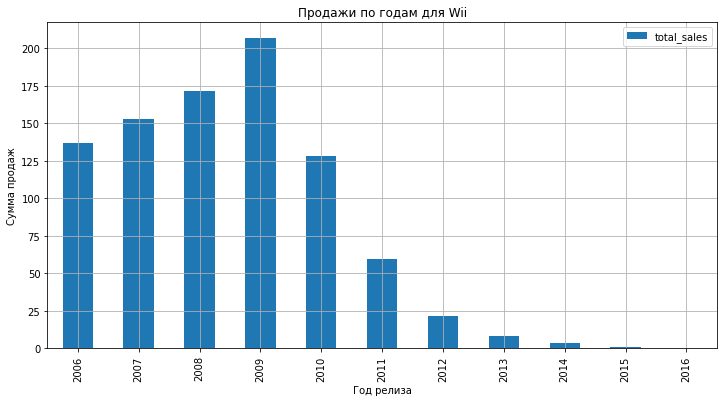

In [28]:
wii = games.query('platform == "Wii"').groupby('year_of_release').agg({'total_sales': 'sum'})
wii.plot(kind='bar', title='Продажи по годам для Wii', xlabel='Год релиза', ylabel='Сумма продаж', figsize=(12,6), grid=True)
plt.show()

Время жизни Wii - с 2006 по нынешний день, но в 2016 уже почти изжила себя - опять 10 лет

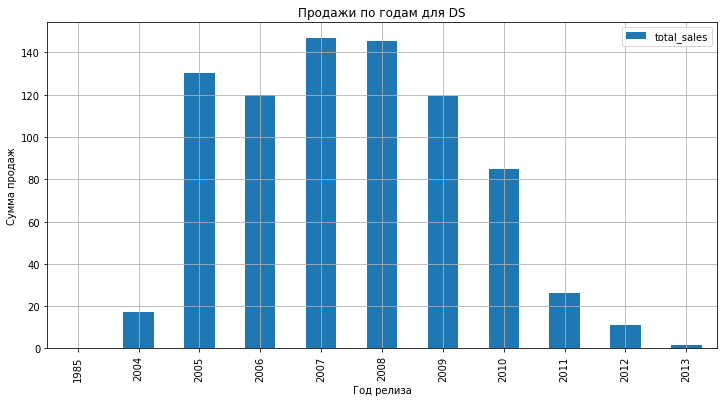

In [29]:
ds = games.query('platform == "DS"').groupby('year_of_release').agg({'total_sales': 'sum'})
ds.plot(kind='bar', title='Продажи по годам для DS', xlabel='Год релиза', ylabel='Сумма продаж', figsize=(12,6), grid=True)
plt.show()

Время жизни DS - вышла в 1985 (но данных практически нет). С 2004 года по 2013 год - 9 активных лет жизни

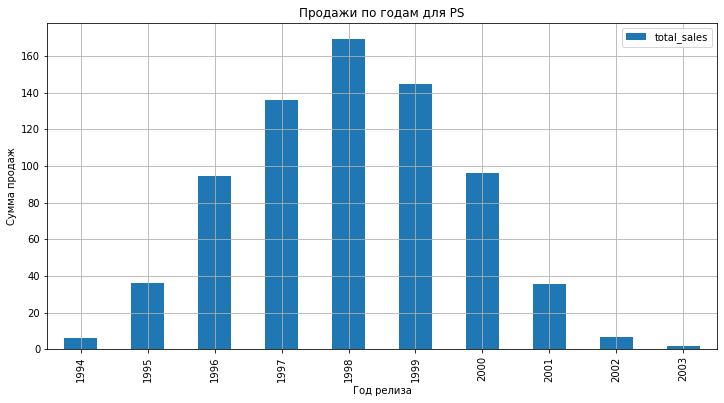

In [30]:
ps = games.query('platform == "PS"').groupby('year_of_release').agg({'total_sales': 'sum'})
ps.plot(kind='bar', title='Продажи по годам для PS', xlabel='Год релиза', ylabel='Сумма продаж', figsize=(12,6), grid=True)
plt.show()

Время жизни PS - с 1994 года до 2003 - практически 10 лет

Подведём итоги:

- в среднем платформа живет 10 лет - период покупки игр для платформы игроками
- в среднем период активных продаж игр на платформу составляет 5 лет - максимальная популярность у игроков с дальнейшим спадом в ноль и завершением продаж

<font color='DarkOrange'><b>Комментарий студента</b></font><br>
Фильтрация заглушки убрана, название графика и осей - добавлены, размер графиков немного увеличен!

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

В вопросе выбора актуального периода будем опираться на срок максимальных продаж игр для игровых консолей - 5 лет - и на основании выводов по этим данным попробуем "предсказать" 2017 год.

Актуальным периодом для нас станет период с 2012 по 2016 год - вышли или почти вышли все популярные платформы, продажи игр для платформ - показательны и будут актуальны в 2017 году - при взятии более широкого периода велик риск попадания платформ, которые морально и физически устарели и не имеют популярности у игроков - для нас это вовсе неинтересно. Также будем особенно присматриваться к последним годам - для нас это 2016 (несмотря на недостаточность данных) - как к наиболее близкому к 2017 году.

Остальные года отфильтруем.

Сделаем отдельный срез данных за интересующий нас период для дальнейшей работы

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно выбран актуальный период. 👍 Сейчас в наше динамичное время в бизнесе уже используются для прогноза периоды в 2-3 года.</font>

In [31]:
games_actual = games.query('2012 <= year_of_release <= 2016 ')
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     2886 non-null   float64
 9   user_score       2886 non-null   float32
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float32(1), float64(6), int64(1), object(4)
memory usage: 281.8+ KB


#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Определим, какие платформы лидируют по продажам

In [32]:
games_actual.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Построим сводную таблицу в разрезе платформ и года выпуска игр

In [33]:
income = (pd.pivot_table(games_actual, 
              index='year_of_release', 
                 values='total_sales', 
                 columns=['platform'], 
                      aggfunc=['sum'])
)

income

sum                                                         \
platform          3DS    DS    PC    PS3    PS4  PSP   PSV   Wii  WiiU  X360   
year_of_release                                                                
2012            51.36 11.01 23.22 107.36    NaN 7.69 16.19 21.71 17.56 99.74   
2013            56.57  1.54 12.38 113.25  25.99 3.14 10.59  8.59 21.65 88.58   
2014            43.76   NaN 13.28  47.76 100.00 0.24 11.90  3.75 22.03 34.74   
2015            27.78   NaN  8.52  16.82 118.90 0.12  6.25  1.14 16.35 11.96   
2016            15.14   NaN  5.25   3.60  69.25  NaN  4.25  0.18  4.60  1.52   

                       
platform         XOne  
year_of_release        
2012              NaN  
2013            18.96  
2014            54.07  
2015            60.14  
2016            26.15

На 2016 год DS и PSP уже неактуальны :(

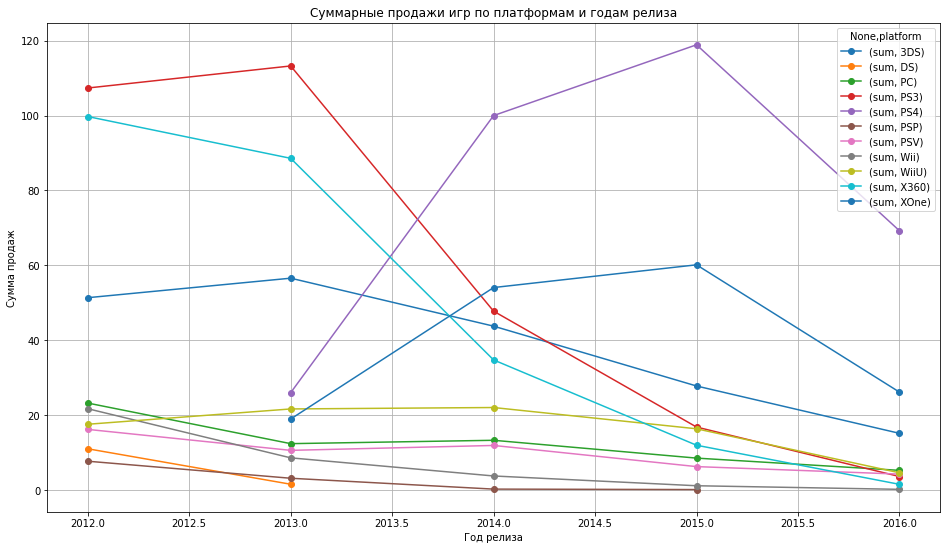

In [34]:
income.plot(kind='line', 
            title='Суммарные продажи игр по платформам и годам релиза',
            xlabel='Год релиза',
            ylabel='Сумма продаж',
            figsize=(16, 9),
            marker='o',
            grid=True)
plt.show()

Ретроспективно посмотрим на войны за рынок игр:

- Для PS4 и XOne максимум продаж приходится на 2015 год - сравнительно новые консоли в представленной выборке
- Для PS4 и XOne время выхода на пиковые продажи составляло два года - значит, что для платформы нового поколения понадобится примерно столько же времени 
- Остальные платформы (PS3, X360, 3DS) находятся в конце своего жизненного цикла
- Безусловными лидерами на конец 2016 года являются PS4, XOne и 3DS
- Количество продаж игр, выпущенных на каждую из платформ, планомерно снижается к 2016 году, что может свидетельствовать о снижении ликвидности рынка игр в целом

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Построим диаграммы размаха для всех платформ нашего актуального периода

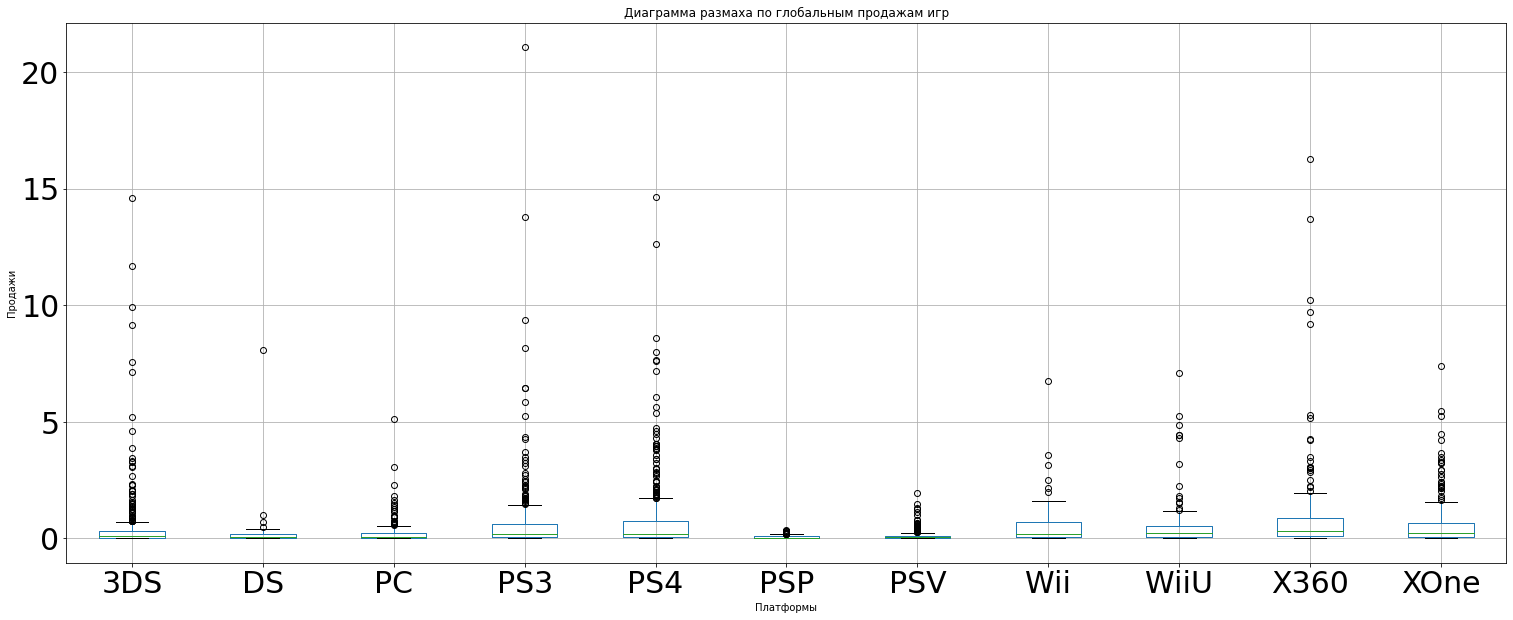

In [35]:
games_actual
boxplot = games_actual.boxplot(by='platform',
                               column='total_sales',
                               fontsize=30,
                               figsize=(25, 10))
plt.title('Диаграмма размаха по глобальным продажам игр')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.suptitle('')
plt.show()

Достаточно нечитабельно. Используем параметр ylims и посмотрим поближе.

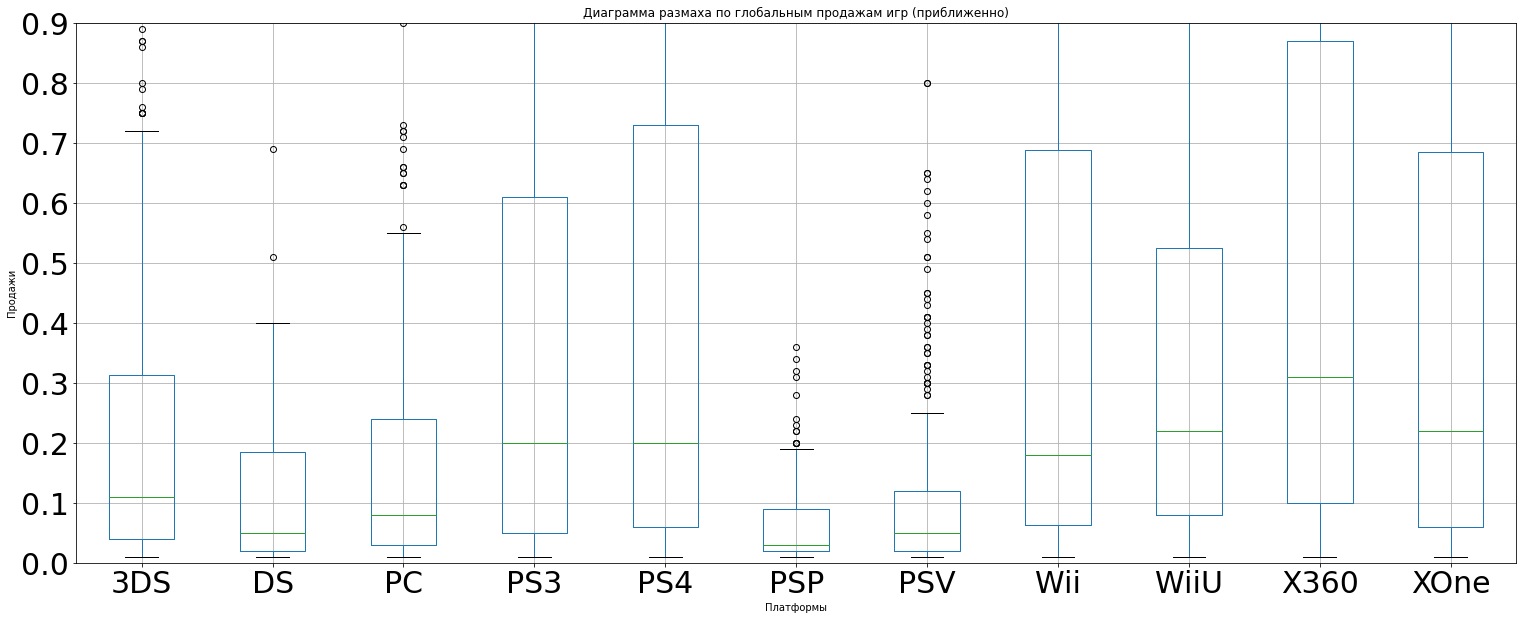

In [36]:
games_actual
boxplot = games_actual.boxplot(by='platform',
                               column='total_sales',
                               fontsize=30,
                               figsize=(25, 10))
plt.ylim(0, 0.9)
plt.title('Диаграмма размаха по глобальным продажам игр (приближенно)')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.suptitle('')
plt.show()

Есть много проходных игр с низкими продажами и есть много выбросов - что в данном случае показывает крайне популярные линейки игр, собирающих основные продажи.

Медианы для платформ варьируются от 0.05 до 0.3 млн долларов прибыли за игру и расположены достаточно близко друг к другу.
Верхняя граница предела, за которыми уже определяются аномалии - на уровне 1,7 млн долларов.

<font color='DarkOrange'><b>Комментарий студента</b></font><br>
Диаграммы размаха перестроены, параметр ylim - использован, увеличила читабельность изо всех сил!

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Молодец, правильное решение. 👍</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 А почему мы строим диаграммы размаха только по двум платформам? В задании топ-платформы не требуются, предполагаются все. Мы таким образом теряем информацию о лидерах по стабильным продажам игр. И диаграммы размаха надо строить в двух видах, в полном, со всеми выбросами и масштабированном с крупными боксплотами. Для вывода только нижней части boxplot-ов необходимо использовать параметр ylim. И для сравнительного анализа следует диаграммы размаха размещать на одной координатной сетке.</font>

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Посмотрим на примере PS4. Создадим отдельныt датасеты и отфильтруем все невалидные данные - для пользователей и критиков соответственно.

In [37]:
ps4_ratings_critic_score = (games_actual.loc[:, ['platform', 
                                    'total_sales', 
                                    'critic_score', 
                                    'user_score']]
                    .query('platform == "PS4" and critic_score > 0')
)

In [38]:
ps4_ratings_user_score = (games_actual.loc[:, ['platform', 
                                    'total_sales', 
                                    'critic_score', 
                                    'user_score']]
                    .query('platform == "PS4" and user_score > 0')
)

<font color='DarkOrange'><b>Комментарий студента</b></font><br>
Действительно, наглядно это видно :(
Сейчас всё исправим!

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Как-то мы оптом отфильтровываем заглушки. Если мы анализируем отзывы пользователей, то фильтруем заглушки по ним. Если анализируем отзывы критиков, то фильтруем эти заглушки. А вот удаление одновременно и тех и других ведет к необоснованному удалению данных и искажению расчета корреляции. См.код ниже.</font>

In [39]:
# Комментарий ревьюера
print(len(games_actual.query("platform == 'PS4' & critic_score > 0")))
print(len(games_actual.query("platform == 'PS4' & user_score > 0")))
print(len(games_actual.query("platform == 'PS4' & critic_score > 0 & user_score > 0")))

252
257
249


Посчитаем коэффициент корреляции Пирсона между продажами игр и отзывами.

А затем сделаем красиво с помощью seaborn!

In [40]:
print('Мировые продажи игр и оценка критиков:', 
      ps4_ratings_critic_score['total_sales'].corr(ps4_ratings_critic_score['critic_score']))
print('Мировые продажи игр и оценка игроков:',
      ps4_ratings_user_score['total_sales'].corr(ps4_ratings_user_score['user_score']))

Мировые продажи игр и оценка критиков: 0.406567902061781
Мировые продажи игр и оценка игроков: -0.031957109005188264


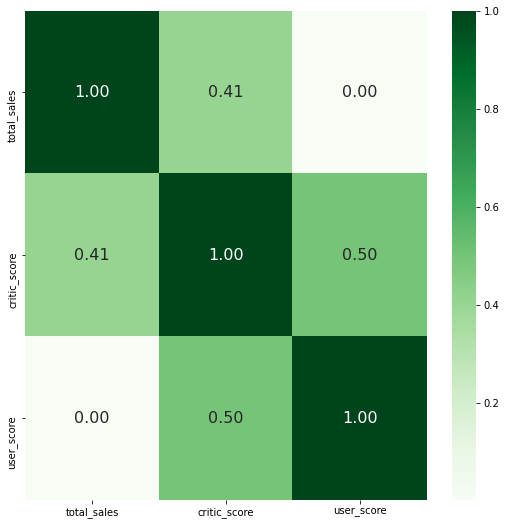

In [41]:
plt.figure(figsize=(9,9))
sns.heatmap(ps4_ratings_critic_score.corr(), annot=True, cmap="Greens", fmt='.2f', annot_kws={'size':16})
plt.show()

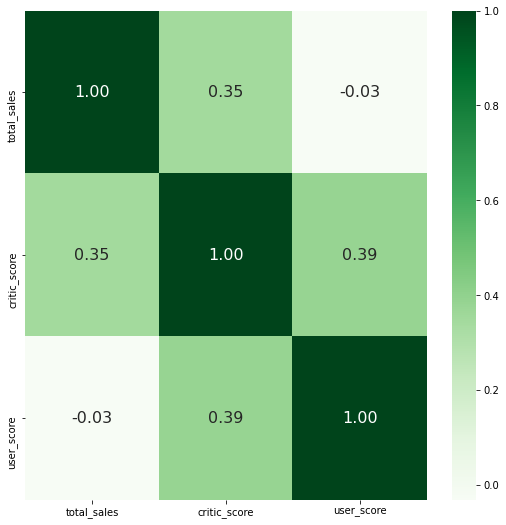

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(ps4_ratings_user_score.corr(), annot=True, cmap="Greens", fmt='.2f', annot_kws={'size':16})
plt.show()

Сильнее всего на конечную стоимость влияет оценка критиков. Практически не влияет - оценка пользователей.

Построим диаграммы рассеяния

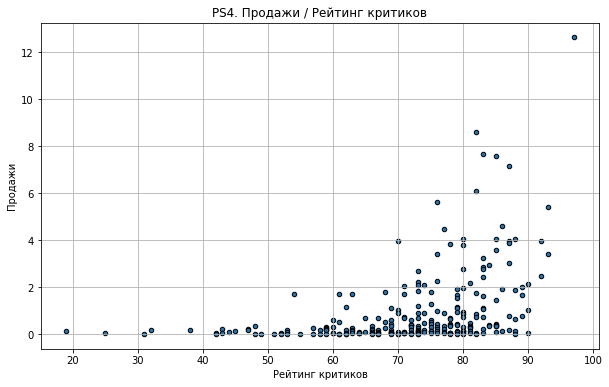

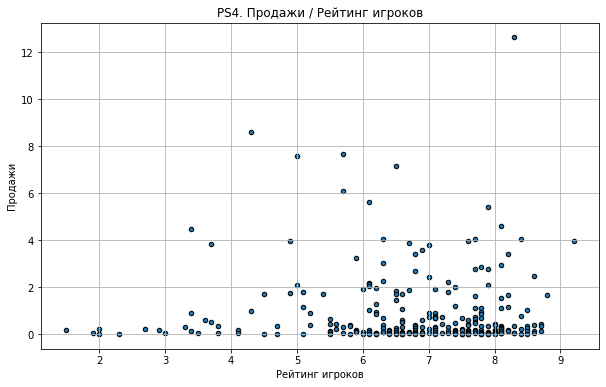

In [43]:
ps4_ratings_critic_score.plot(x='critic_score', 
                              y='total_sales', 
                              kind='scatter', 
                              grid=True,
                              ec='black',
                              figsize=(10,6),
                              title='PS4. Продажи / Рейтинг критиков',
                              xlabel='Рейтинг критиков',
                              ylabel='Продажи')
plt.show()

ps4_ratings_user_score.plot(x='user_score', 
                            y='total_sales', 
                            kind='scatter', 
                            grid=True,
                            ec='black',
                            figsize=(10,6),
                            title = 'PS4. Продажи / Рейтинг игроков',
                            xlabel='Рейтинг игроков',
                            ylabel='Продажи')
plt.show()

Краткий итог:

- Чем выше средний рейтинг критиков, тем выше средний уровень дохода с продаж игр

- Диаграммы рассеяния подтверждают такой результат и показывают, что большинство продаж и все игры с высокими показателями продаж имеют оценки критиков более 60/100.

- Примерно такая же ситуация с оценками пользователей, только выбросов - больше (при низком рейтинге большой доход).  Предположу, что это связано с агрессивным маркетинговым некоторых линеек игр - после покупки игроки разочарованно ставят дизлайки. Судя по корреляции, влияние мнения пользователей невелико.


<font color='DarkOrange'><b>Комментарий студента</b></font><br>
Заглушки отфильтрованы корректно, поправлены подписи к графикам, дополнены выводы

#### Соотнесите выводы с продажами игр на других платформах.

Проделаем аналогичные операции для ряда других платформ!

Рассмотрим следующие за PS4 пять платформ с наивысшими суммарными продажами.

В расматриваемые войдут PS3, X360, 3DS, XOne и WiiU (хотя её суммарные продажи почти в два раза ниже, чем у XOne - ближайшего соседа).

In [44]:
# объявим список интересующих нас платформ и используем циклы
# для построения диаграмм рассеивания и расчёта корреляции
platforms = ['PS3', 'X360', 'XOne', '3DS','WiiU']

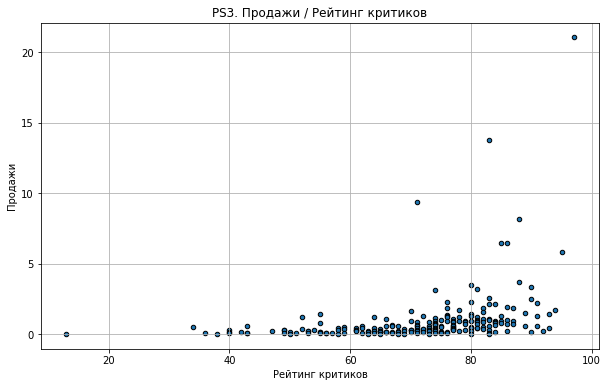

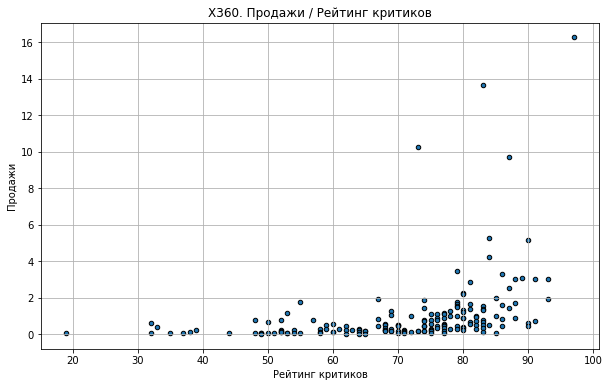

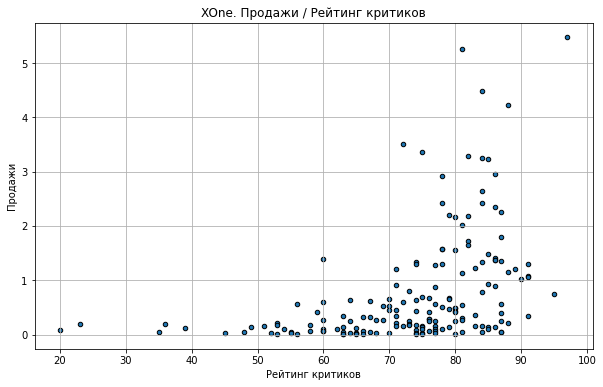

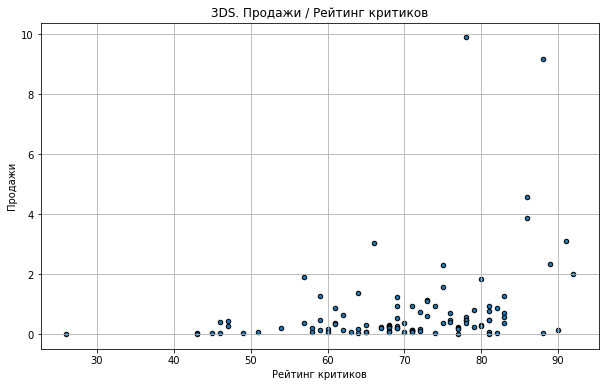

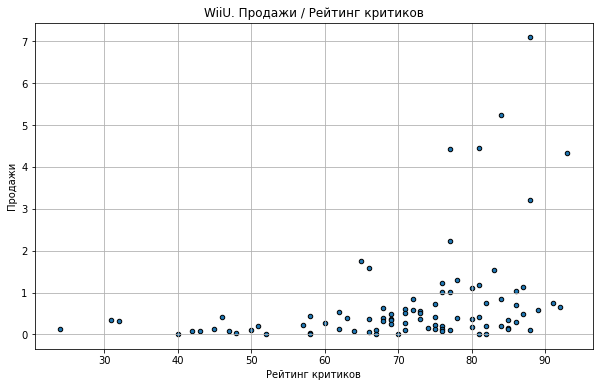

In [45]:
# диаграммы рассеяния - оценки критиков
for platform in platforms:
    games_actual.query('critic_score > 0').loc[games_actual['platform'] == platform].plot(x='critic_score', 
                                                                                          y='total_sales', 
                                                                                          kind='scatter', 
                                                                                          grid=True,
                                                                                          ec='black',
                                                                                          figsize=(10,6),
                                                                                          title = f'{platform}. Продажи / Рейтинг критиков',
                                                                                          xlabel='Рейтинг критиков',
                                                                                          ylabel='Продажи')
plt.show()

In [46]:
# корреляция - оценки критиков
correlation_critics = []

for platform in platforms:
    correlation_critic = games_actual.query('critic_score > 0').loc[games_actual['platform'] == platform]['critic_score'].corr(games_actual['total_sales'])
    correlation_critics.append([f'Для продаж {platform} и оценок критиков корреляция равна — {round(abs(correlation_critic), 2)}'])

for correlation_critic in correlation_critics:
    print(*correlation_critic)

Для продаж PS3 и оценок критиков корреляция равна — 0.33
Для продаж X360 и оценок критиков корреляция равна — 0.36
Для продаж XOne и оценок критиков корреляция равна — 0.42
Для продаж 3DS и оценок критиков корреляция равна — 0.32
Для продаж WiiU и оценок критиков корреляция равна — 0.35


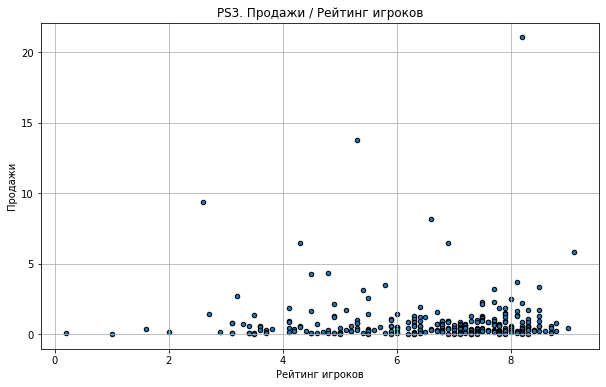

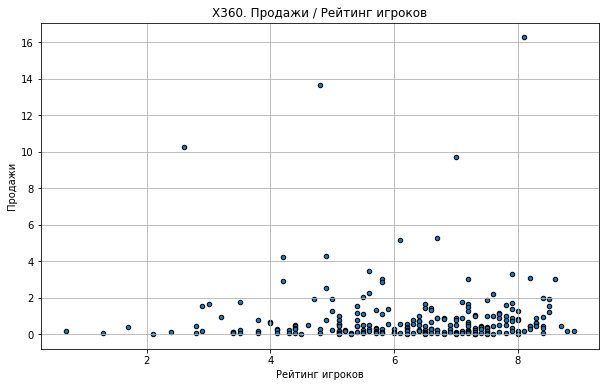

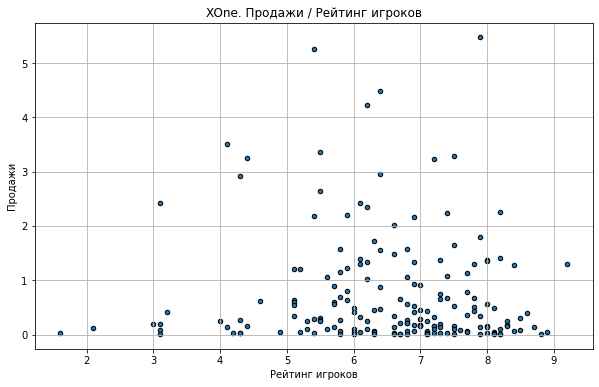

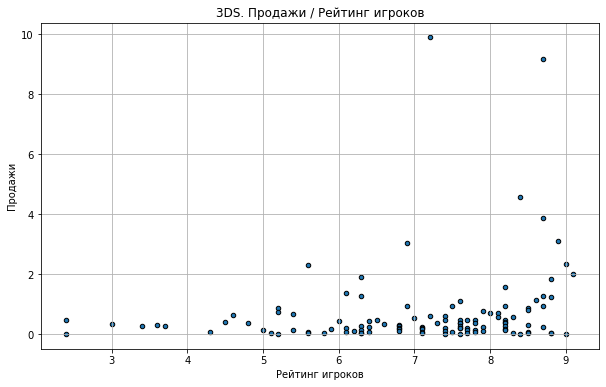

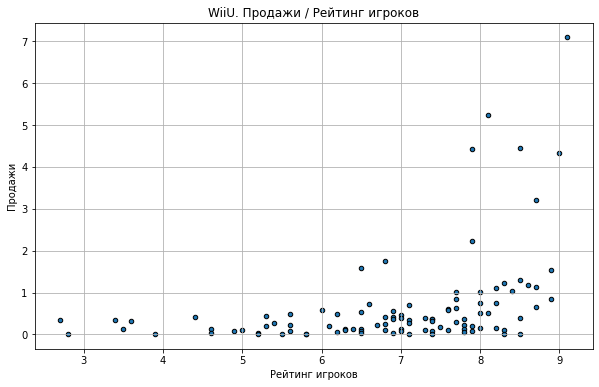

In [47]:
# диаграммы рассеяния - оценки игроков
for platform in platforms:
    games_actual.query('user_score > 0').loc[games_actual['platform'] == platform].plot(x='user_score', 
                                                                                        y='total_sales', 
                                                                                        kind='scatter', 
                                                                                        grid=True,
                                                                                        ec='black',
                                                                                        figsize=(10,6),
                                                                                        title = f'{platform}. Продажи / Рейтинг игроков',
                                                                                        xlabel='Рейтинг игроков',
                                                                                        ylabel='Продажи')
plt.show()

In [48]:
# корреляция - оценки игроков
correlation_users = []

for platform in platforms:
    correlation_user = games_actual.query('user_score > 0').loc[games_actual['platform'] == platform]['user_score'].corr(games_actual['total_sales'])
    correlation_users.append([f'Для продаж {platform} и оценок игроков корреляция равна — {round(abs(correlation_user), 2)}'])

for correlation_user in correlation_users:
    print(*correlation_user)

Для продаж PS3 и оценок игроков корреляция равна — 0.01
Для продаж X360 и оценок игроков корреляция равна — 0.01
Для продаж XOne и оценок игроков корреляция равна — 0.07
Для продаж 3DS и оценок игроков корреляция равна — 0.2
Для продаж WiiU и оценок игроков корреляция равна — 0.4


Краткий итог:
- Единственная платформа, для которой мнение игроков оказывает существенное влияние - WiiU
- Мнение критиков влияет на продажи всех рассматриваемых платформ

Диаграммы рассеивания подтверждают тезисы

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
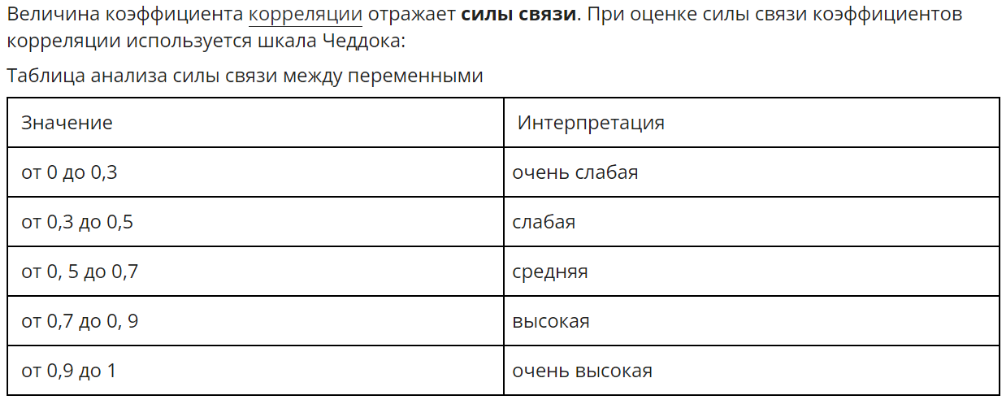

<font color='DarkOrange'><b>Комментарий студента</b></font><br>
Пять последующих за PS4 платформ проанализированы: заглушки отфильтрованы корректно, поправлены подписи к графикам, дополнены выводы. Для построения диаграмм рассеивания и расчёта корреляции использованы циклы.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно. 👍</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <b>Соотнесите выводы с продажами игр на других платформах.</b> А мы сравнили только две. Выводы, сделанные на основе диаграмм рассеяния и расчетов по нескольким платформам выглядят "весомей" и убедительней. Все платформы не надо, но хотя бы штук пять. Построение диаграмм рассеяния и расчет корреляции можно сделать циклом.</font>

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Нагляднее всего будет выглядеть столбчатая диаграмму с количеством и общей суммой продаж - построим её за актуальный для исследования период и посмотрим на результат.

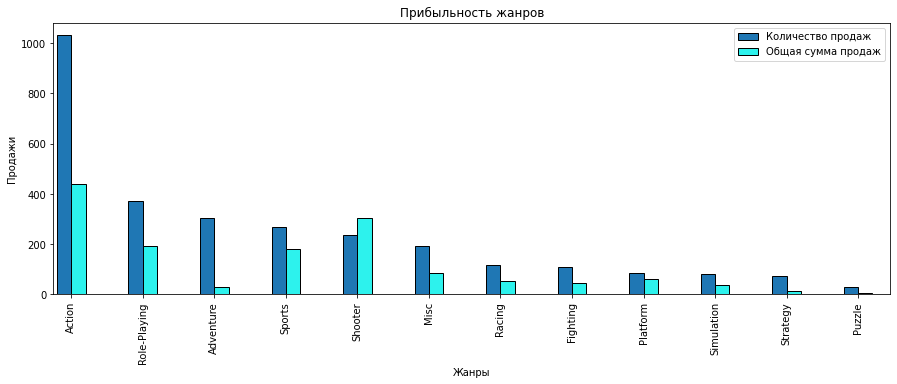

In [49]:
ax = plt.gca()

pivot = games_actual.groupby('genre').agg({'name': 'count',
                                           'total_sales': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']

plot1.plot(kind='bar',
           figsize=(15,5),
           ec='black',
           ax=ax,
           width=0.2,
           position=1
)

plot2 = pivot['total_sales']

plot2.plot(kind='bar',
           figsize=(15,5),
           ec='black',
           ax=ax,
           width=0.2,
           color='#2df2ed',
           position=0
)

plt.title('Прибыльность жанров')
ax.legend(['Количество продаж', 'Общая сумма продаж'])
plt.xlabel('Жанры')
plt.ylabel('Продажи')

plt.show()

In [50]:
# посчитаем медианы и посмотрим на них
print("Рейтинг жанров")
print(games_actual.groupby(by='genre', dropna=True)['total_sales'].median().sort_values(ascending=False))

Рейтинг жанров
genre
Shooter        0.44
Sports         0.24
Platform       0.21
Role-Playing   0.14
Racing         0.14
Fighting       0.13
Action         0.12
Misc           0.12
Simulation     0.12
Strategy       0.08
Puzzle         0.04
Adventure      0.03
Name: total_sales, dtype: float64


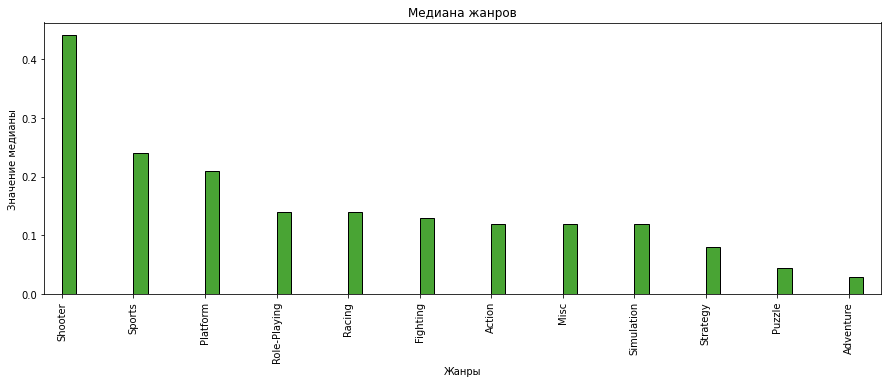

In [51]:
# посмотрим на медианы
games_actual.groupby(by='genre', dropna=True)['total_sales'].median().sort_values(ascending=False).plot(kind='bar',
                                                                                                        figsize=(15,5),
                                                                                                        ec='black',
                                                                                                        width=0.2,
                                                                                                        color='#49a434',
                                                                                                        position=0)
plt.title('Медиана жанров')
plt.xlabel('Жанры')
plt.ylabel('Значение медианы')
plt.show()

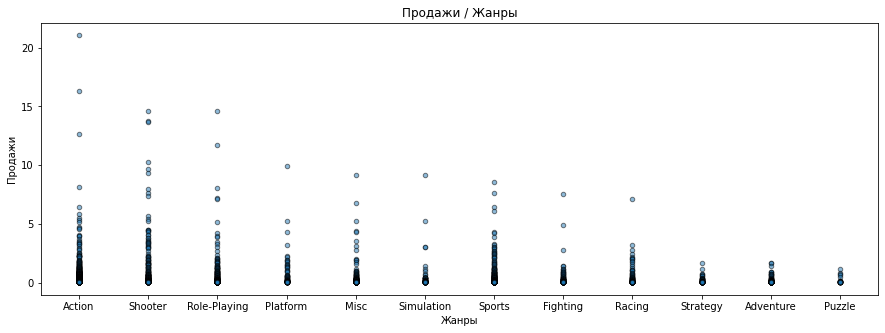

In [52]:
# построим диаграмму рассеяния
games_actual.plot(kind='scatter',
                  x='genre',
                  y='total_sales',
                  ec='black',
                  figsize=(15,5),
                  alpha=0.5)
plt.title('Продажи / Жанры')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

По количеству продаж:
 - В топе - Action, Role-Playing и Adventure
 - В конце - Strategy и Puzzle
 
По общей сумме продаж:
- В топе - Action, Shooter и Sports
- В конце - Adventure, Strategy, Puzzle

По медиане продаж:
- В топе - Shooter
- Середина - Sports и Platform
- В конце - Strategy, Puzzle и Adventure 

В принципе, всё логично - игры с красивой графикой и большим увлечением - в топе, логические и интелектуальные игры - в конце списка. Явно выбиваются два жанра - Adventure (в конце списка по общей сумме продаж, но в топе по количеству) и Shooter (при средних показателях количества продаж находится в топе по общей сумме - объясняется тем, что имеет самую высокую медиану).

Очевидно, что затраты на производство игр данных жанров выше, чем на условные "Три в ряд".

<font color='DarkOrange'><b>Комментарий студента</b></font><br>
Построены графики медианы и размаха по жанрам!
Если это - неверно, то укажи, пожалуйста, с примерами для хлебушков, что именно нужно сделать - возможно, я не совсем правильно поняла :(

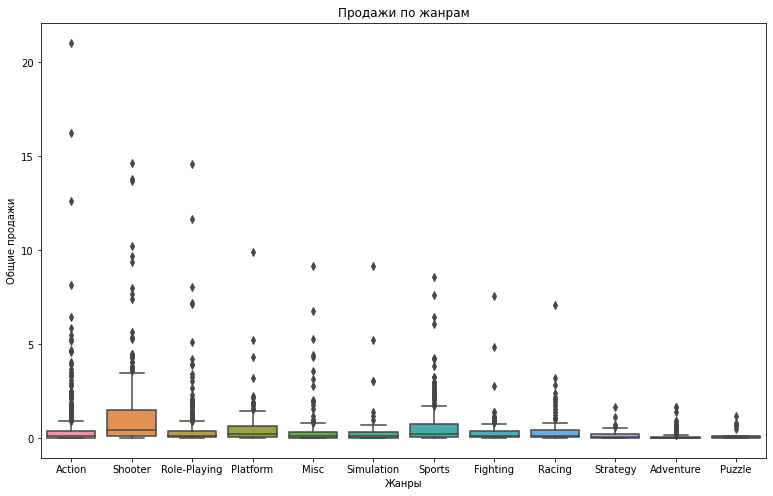

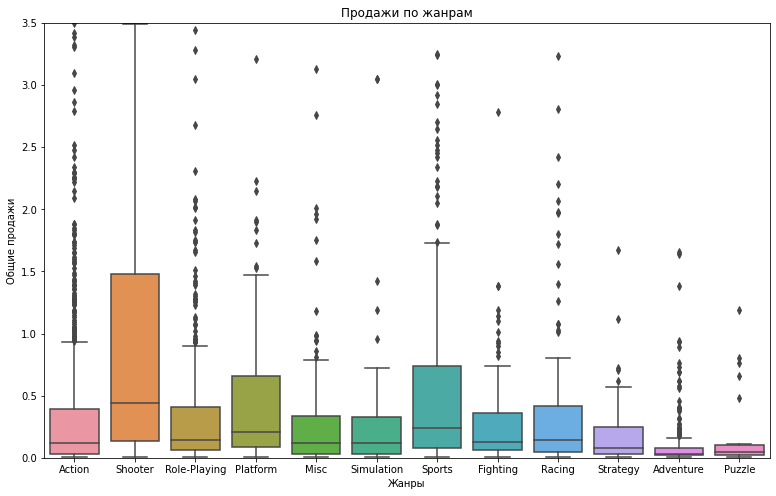

In [74]:
# Комментарий ревьюера 2
''' Мы путаем диаграммы рассеяния и размаха. Вот так было бы нагляднее:'''
import seaborn as sns
data_temp, y = games_actual, 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3.5)))
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 В проекте под "прибыльностью" понимается наличие устойчивого спроса пользователей на данный жанр. Можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить немеряно денег в рекламу и продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от маркетинговых усилий производителей игр.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Мы здесь попали в ловушку, что максимальные продажи являются самыми прибыльными. Но у нас в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы провалились. Но для прибыльности нам нужен стабильные жанры, который приносит доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.</font><br>
<font color='Red'>🛠 По этому нам лучше добавить сравнение медианных продаж, проиллюстрировав их диаграммами размаха и изменить промежуточные выводы. Сделаем?</font>

### *Составьте портрет пользователя каждого региона*
___

#### Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Посмотрим, что с платформами

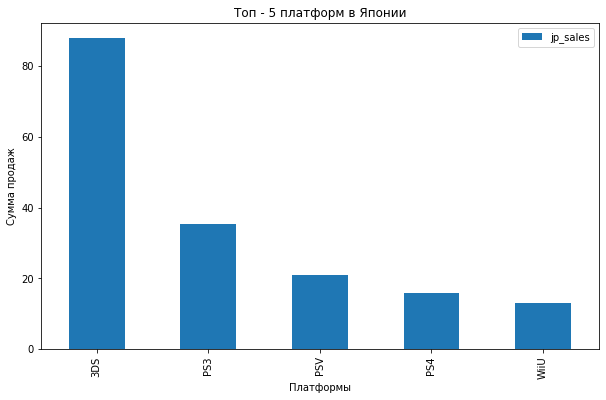

In [53]:
games_actual.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar',
                                                                                                                     figsize=(10,6))
plt.title('Топ - 5 платформ в Японии')
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж')
plt.show()

На рынке Японии самой популярной по - прежнему является 3DS, а далее идёт линейка PS

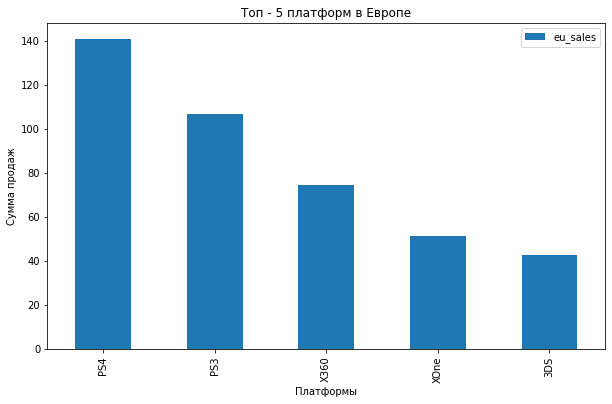

In [54]:
games_actual.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar',
                                                                                                                     figsize=(10,6))
plt.title('Топ - 5 платформ в Европе')
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж')
plt.show()

На рынке Европы - ровно наоборот, наиболее популярна именно линейка консолей PS, PS4 - лидирует

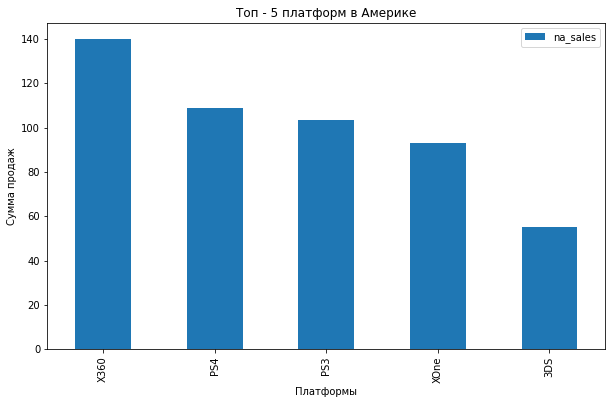

In [55]:
games_actual.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar',
                                                                                                                     figsize=(10,6))
plt.title('Топ - 5 платформ в Америке')
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж')
plt.show()

На рынке Северной Америки - картина похожа на Европу, но лидирует - X360

Посмотрим на различия в долях продаж. Определим популярные платформы, посчитаем суммарные продажи по регионам и долю платформы от общих продаж

In [56]:
# популярные платформы
region_sales = (games_actual
                .groupby('platform')
                .agg({'jp_sales': 'sum',
                      'eu_sales': 'sum',
                      'na_sales': 'sum',  
                      'total_sales': 'sum'}))

# суммарные продажи
jp_total_sales = games_actual['jp_sales'].sum()
eu_total_sales = games_actual['eu_sales'].sum()
na_total_sales = games_actual['na_sales'].sum()

# доля платформы
region_sales['jp_share'] = region_sales['jp_sales'] / jp_total_sales
region_sales['eu_share'] = region_sales['eu_sales'] / eu_total_sales
region_sales['na_share'] = region_sales['na_sales'] / na_total_sales

print('Доля платформ для Японии:\n', 
      region_sales.sort_values(by='jp_sales', ascending=False).loc[:, ['jp_share']].head())
print('--------------------------')
print('Доля платформ для Европы:\n', 
      region_sales.sort_values(by='eu_sales', ascending=False).loc[:, ['eu_share']].head())
print('--------------------------')
print('Доля платформ для Северной Америки:\n', 
      region_sales.sort_values(by='na_sales', ascending=False).loc[:, ['na_share']].head())

Доля платформ для Японии:
           jp_share
platform          
3DS           0.46
PS3           0.18
PSV           0.11
PS4           0.08
WiiU          0.07
--------------------------
Доля платформ для Европы:
           eu_share
platform          
PS4           0.28
PS3           0.21
X360          0.15
XOne          0.10
3DS           0.08
--------------------------
Доля платформ для Северной Америки:
           na_share
platform          
X360          0.24
PS4           0.18
PS3           0.17
XOne          0.16
3DS           0.09


Краткий итог:
- В Японии большая доля консоли 3DS - портативные консоли там действительно популярнее, чем домашние модели
- В Европе большие доли консолей PS3 и PS4
- В Северной Америке лидирует X360

Посмотрим на жанры

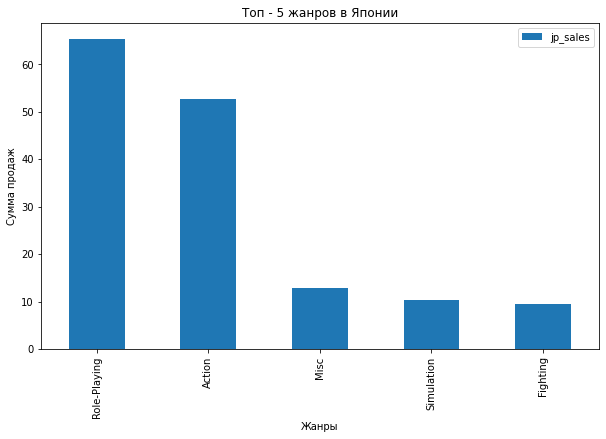

In [57]:
games_actual.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar',
                                                                                                                  figsize=(10,6))
plt.title('Топ - 5 жанров в Японии')
plt.xlabel('Жанры')
plt.ylabel('Сумма продаж')
plt.show()

На рынке Японии популярны жанры Role-Playing и Action, можно сказать, что они в целом определяющие

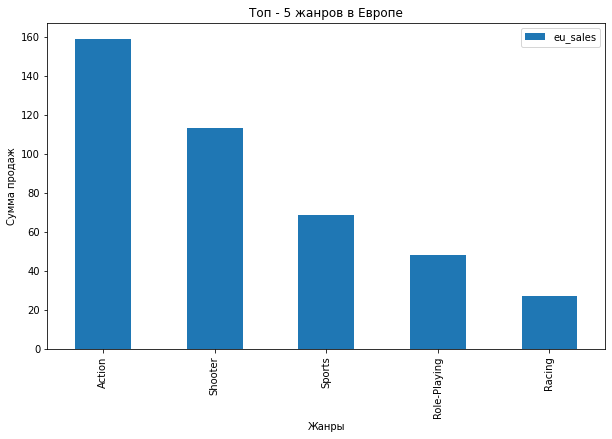

In [58]:
games_actual.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar',
                                                                                                                  figsize=(10,6))
plt.title('Топ - 5 жанров в Европе')
plt.xlabel('Жанры')
plt.ylabel('Сумма продаж')
plt.show()

На рынке Европы - популярны жанры Action, Shooter и Sports

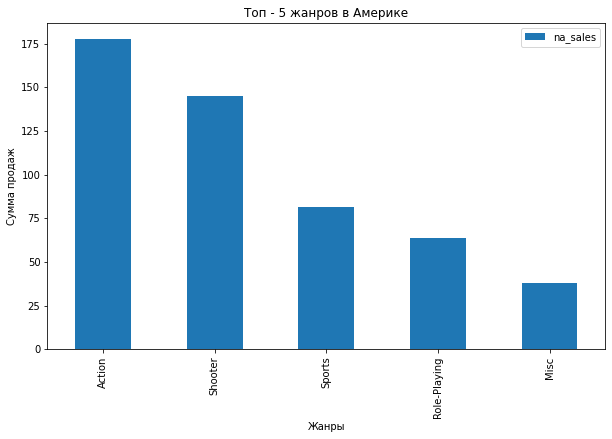

In [59]:
games_actual.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar',
                                                                                                                  figsize=(10,6))
plt.title('Топ - 5 жанров в Америке')
plt.xlabel('Жанры')
plt.ylabel('Сумма продаж')
plt.show()

На рынке Северной Америки - также популярны жанры Action, Shooter и Sports

In [60]:
region_genre = (games_actual
                .groupby('genre')
                .agg({'jp_sales': 'sum',
                      'eu_sales': 'sum',
                      'na_sales': 'sum', 
                      'total_sales': 'sum'}))

region_genre['jp_share'] = region_genre['jp_sales'] / jp_total_sales
region_genre['eu_share'] = region_genre['eu_sales'] / eu_total_sales
region_genre['na_share'] = region_genre['na_sales'] / na_total_sales


print('Доли жанров для Японии:\n', 
      region_genre.sort_values(by='jp_sales', ascending=False).loc[:, ['jp_share']].head())
print('--------------------------')
print('Доли жанров для Европы:\n', 
      region_genre.sort_values(by='eu_sales', ascending=False).loc[:, ['eu_share']].head())

print('--------------------------')
print('Доли жанров для Северной Америки:\n', 
      region_genre.sort_values(by='na_sales', ascending=False).loc[:, ['na_share']].head())

Доли жанров для Японии:
               jp_share
genre                 
Role-Playing      0.34
Action            0.27
Misc              0.07
Simulation        0.05
Fighting          0.05
--------------------------
Доли жанров для Европы:
               eu_share
genre                 
Action            0.31
Shooter           0.22
Sports            0.14
Role-Playing      0.10
Racing            0.05
--------------------------
Доли жанров для Северной Америки:
               na_share
genre                 
Action            0.30
Shooter           0.24
Sports            0.14
Role-Playing      0.11
Misc              0.06


Краткий итог: рынок Северной Америки и Европы сильно схожи между собой, тогда как рынок Японии - сильно разнится как по платформам, так и по жанрам.

<font color='DarkOrange'><b>Комментарий студента</b></font><br>
Исправлены графики - теперь везде есть корректные подписи! Не понимаю коммент про топ - 5 - у меня же сортировка и .head(5) - вроде ровно то, что и нужно...
Искренне пыталась разобраться с визуализацией пирогом - не получается, как бы не пыталась((( Судя по цвету коммента - это место, где можно лучше, а не то, что нужно исправить - может, ты подскажешь на будущее, как нужно сделать? Я - в затруднении(

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Держи код тортика:</font>
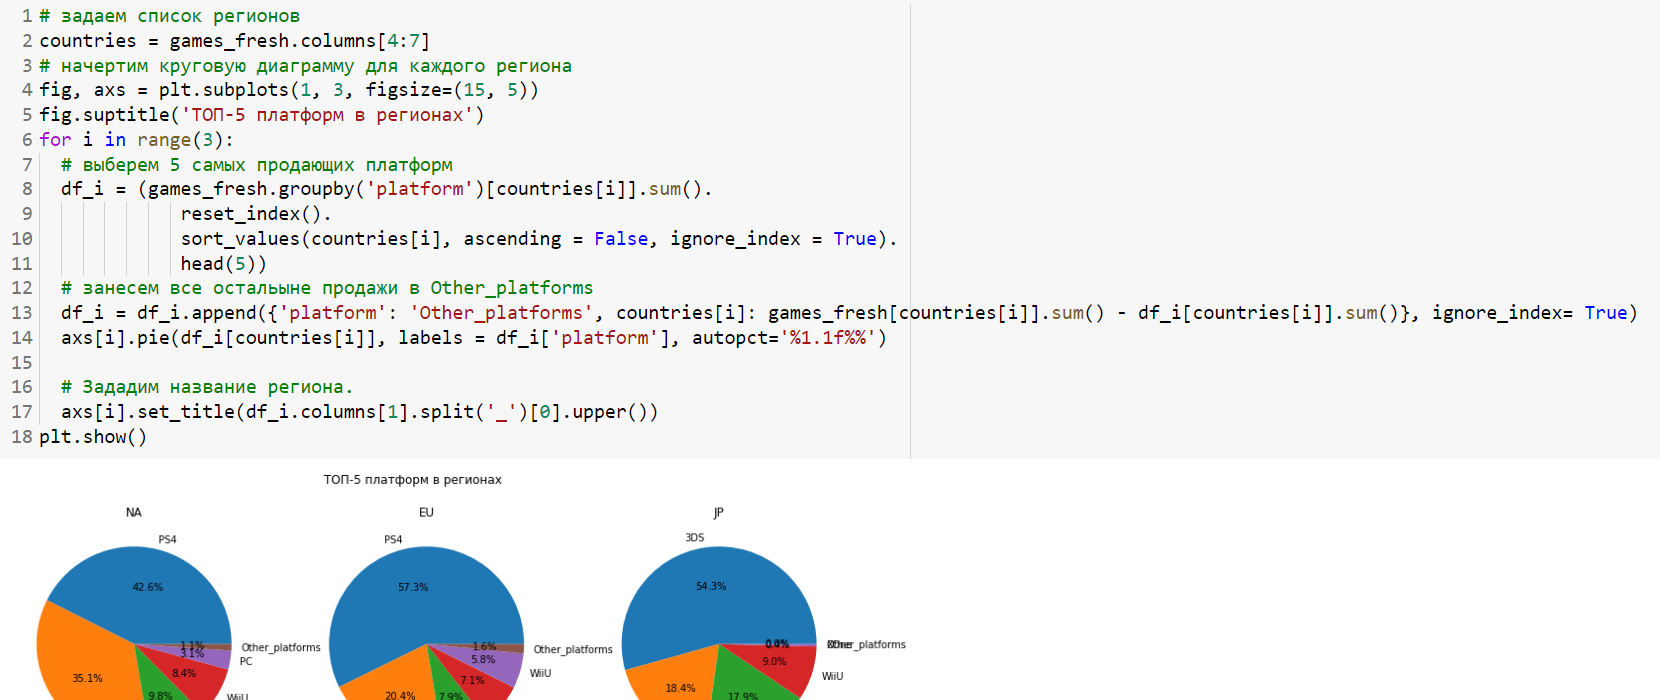

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 А у нас в задании просят сделать анализ по топ-5. И лучше визуализировать круговой диаграммой, только продажи платформ/жанров не вошедших в топ, собрать в одной группе, например "Другие", и по платформам, и по жанрам. Сделаем? Примерно вот так:</font>
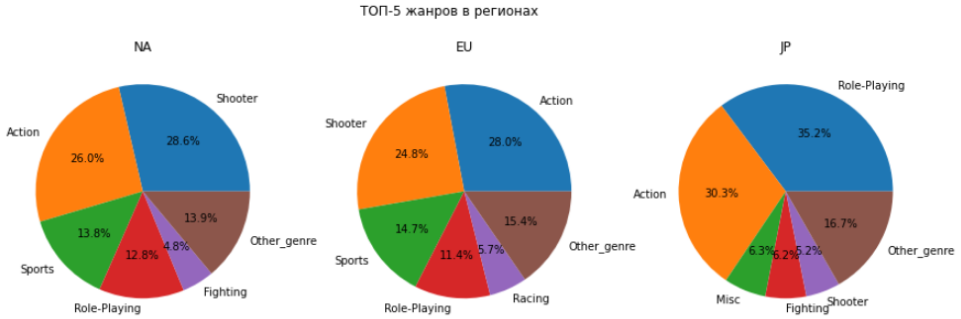

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 С группой "Другие" на круговых диаграммах хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. И наша визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм.</font>

Посмотрим, как влияет рейтинг ESRB на продажи в отдельном регионе - и влияет ли

In [61]:
games['rating'].unique()

array(['E', 'no data', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Так не сильно понятно, что именно каждый из них обозначает. Найдём описание рейтингов, соберём в словарь и добавим новый столбец с описанием

In [62]:
ESRB_rename_dict = {'E': 'Для всех (>6)',
                    'M': 'Для взрослых (>17)',
                    'T': 'Подросткам (>13)',
                    'E10+': 'Для всех от 10 и старше (>10)',
                    'K-A': 'Для детей и взрослых (>6)',
                    'AO' : 'Только для взрослых (>18)',
                    'EC' : 'Для детей младшего возраста (>3)',
                    'RP' : 'Рейтинг ожидается'}

In [63]:
# добавляем описание в  датафрейм для анализа и применяем словарь через функцию map
games_actual['ESRB_description'] = games[games['rating'].notnull()]['rating'].map(ESRB_rename_dict)

In [64]:
# заполним пропуски в рейтинге
games_actual['ESRB_description'] = games_actual['ESRB_description'].fillna('no data')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно поставлена заглушка на пропуски в колонке рейтинга. И действительно пропуск не савязан с ошибкой заполнения данных, просто не только для Северной Америки выпускаются игры.</font>

Отлично - теперь можно посмотреть

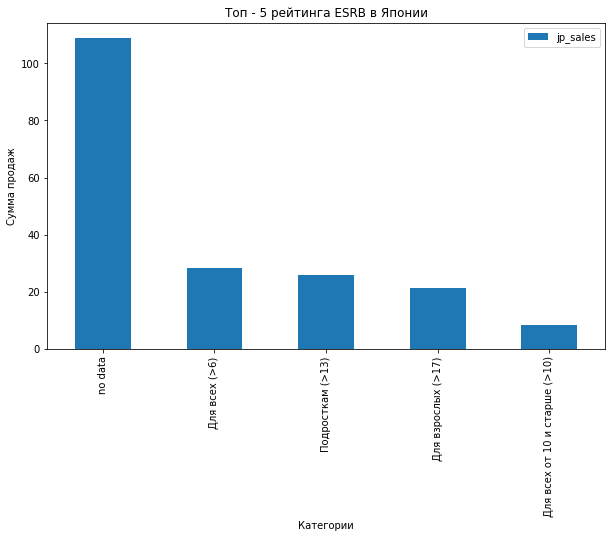

In [65]:
games_actual.groupby(by='ESRB_description').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar',
                                                                                                                             figsize=(10,6))
plt.title('Топ - 5 рейтинга ESRB в Японии')
plt.xlabel('Категории')
plt.ylabel('Сумма продаж')
plt.show()

На рынке Японии - наиболее популярны игры "Для всех", также было продано большое количество игр без рейтинга ESRB вовсе - предположу, что для этого рынка данный рейтинг в принципе не является показателем (или не применяется для портативных консолей, как вариант)

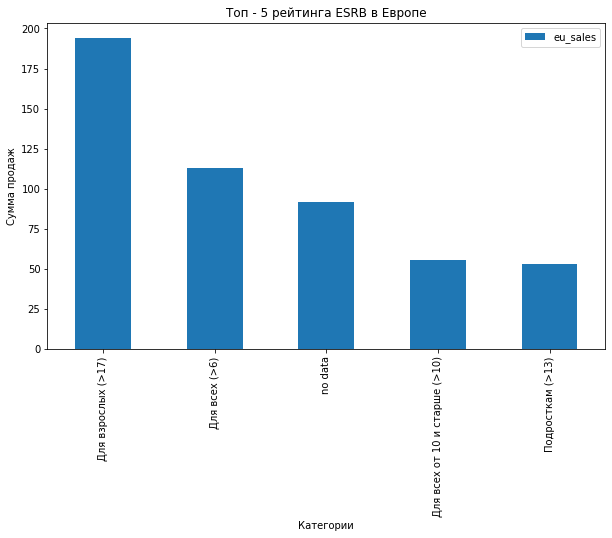

In [66]:
games_actual.groupby(by='ESRB_description').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar',
                                                                                                                             figsize=(10,6))
plt.title('Топ - 5 рейтинга ESRB в Европе')
plt.xlabel('Категории')
plt.ylabel('Сумма продаж')
plt.show()

На рынке Европы - "Для взрослых", затем "Для всех"

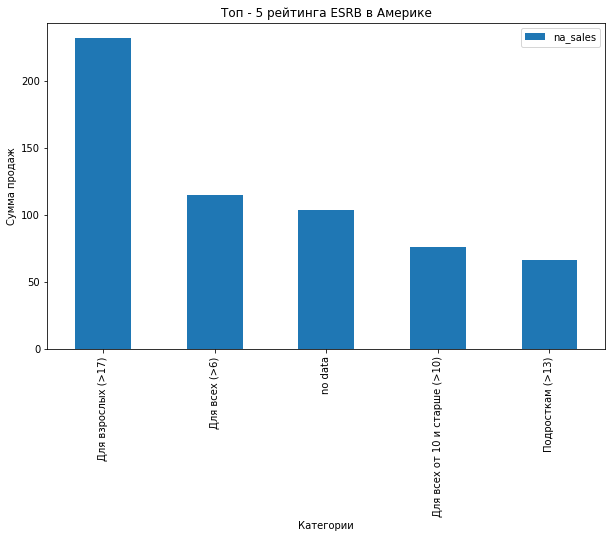

In [67]:
games_actual.groupby(by='ESRB_description').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar',
                                                                                                                             figsize=(10,6))
plt.title('Топ - 5 рейтинга ESRB в Америке')
plt.xlabel('Категории')
plt.ylabel('Сумма продаж')
plt.show()

На рынке Северной Америки ситуация аналогична рынку Европы.

In [68]:
region_ratings = (games_actual
                  .groupby('ESRB_description')
                  .agg({'jp_sales': 'sum',
                         'eu_sales': 'sum', 
                         'na_sales': 'sum'}))
print('Япония:\n', 
      region_ratings.sort_values(by='jp_sales', ascending=False).loc[:, ['jp_sales']])
print('--------------------------')
print('Европа:\n', 
      region_ratings.sort_values(by='eu_sales', ascending=False).loc[:, ['eu_sales']])
print('--------------------------')
print('Северная Америка:\n', 
      region_ratings.sort_values(by='na_sales', ascending=False).loc[:, ['na_sales']])

Япония:
                                jp_sales
ESRB_description                       
no data                          108.84
Для всех (>6)                     28.33
Подросткам (>13)                  26.02
Для взрослых (>17)                21.20
Для всех от 10 и старше (>10)      8.19
--------------------------
Европа:
                                eu_sales
ESRB_description                       
Для взрослых (>17)               193.96
Для всех (>6)                    113.03
no data                           91.50
Для всех от 10 и старше (>10)     55.37
Подросткам (>13)                  52.96
--------------------------
Северная Америка:
                                na_sales
ESRB_description                       
Для взрослых (>17)               231.57
Для всех (>6)                    114.37
no data                          103.31
Для всех от 10 и старше (>10)     75.70
Подросткам (>13)                  66.02


Краткий итог: рынок Японии вновь разительно отличается от рынков Европы и Северной Америки - ни для кого секретом не является, что там играют с самого детства

<font color='DarkOrange'><b>Комментарий студента</b></font><br>
Исправлены графики - теперь везде есть корректные подписи! Спасибо за комментарий, я учту это на будущее! :)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Вот такая проблема была с рейтингом. <br>
А дело в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. А в Японии есть свой рейтинг, свой рейтинг есть в ЕС и отдельно в Германии, Австралии и т.д., но по ним у нас нет данных. То есть, в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе. Необходимо шире смотреть на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. Мы должны это учитывать при предобработке данных. 👍</font>

### *Проверьте гипотезы*

Задайте самостоятельно пороговое значение alpha.
Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.
___

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Гипотезы
- H0: средний пользовательский рейтинг платформы XBox One равен среднему пользовательскому рейтингу PC.
- H1: средний пользовательский рейтинг платформы XBox One не равен среднему пользовательскому рейтингу PC.

В наличии две независимые генеральные совокупности: мнение об играх игроков одной платформы не зависит от мнения игроков других платформ.

Проверим при уровне статистической значимости 1%

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [69]:
list1 = games_actual.query('platform == "XOne"').loc[:, 'user_score'].to_list()
list2 = games_actual.query('platform == "PC"').loc[:, 'user_score'].to_list()

mark = -1.0
for i in list1:
    if mark in list1:
        list1.remove(mark)

for i in list2:
    if mark in list2:
        list2.remove(mark)

In [70]:
alpha = .01
results = ttest_ind(list1,list2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080703899813
Не получилось отвергнуть нулевую гипотезу


<font color='DarkOrange'><b>Комментарий студента</b></font><br>
Да уж, действительно. Исправила!)

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 А не проще было заглушку просто отфильтровать?</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 А мы забыли отфильтровать заглушки.</font>

In [71]:
# Комментарий ревьюера
games_actual.query('platform == "XOne"').loc[:, 'user_score'].min()

-1.0

Нулевая гипотеза не отвергается, т.е. средний пользовательский рейтинг для XBox One и PC одинаковый. Это логично, игра нравится или не нравится игрокам и это не зависит от того, на чем они играют.

####  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотезы
- H0: средний пользовательский рейтинг игр жанра Action равен среднему пользовательскому рейтингу игр жанра Sports.
- H1: средний пользовательский рейтинг игр жанра Action не равен среднему пользовательскому рейтингу игр жанра Sports.

В наличии две независимые генеральные совокупности: мнение игроков об играх одного жанра не зависит от мнения игроков об играх другого жанра.

Проверим при уровне статистической значимости 1%

In [72]:
# соберем данные для проверки гипотез в списки и почистим их от маркера

list3 = games_actual.query('genre == "Action"').loc[:, 'user_score'].to_list()
list4 = games_actual.query('genre == "Sports"').loc[:, 'user_score'].to_list()

mark = -1.0
for i in list3:
    if mark in list3:
        list3.remove(mark)

for i in list4:
    if mark in list4:
        list4.remove(mark)

In [73]:
alpha = .01

results = ttest_ind(list3, list4)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.716303985528181e-26
Отвергаем нулевую гипотезу


<font color='DarkOrange'><b>Комментарий студента</b></font><br>
И здесь тоже :)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Тут у нас аналогичная ошибка. </font>

Нулевая гипотеза отвергается, т.е. рейтинги игр жанров Actions и Sports разные.

<font color='DarkOrange'><b>Комментарий студента</b></font><br>
Хорошо, учту на будущее, что гипотезы нужно дополнительно верифицировать на непротиворечивость :)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Было бы правильным показать дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез.</font>

### *Напишите общий вывод*
___

Потенциально прибыльные платформы:

- На рынке Японии - 3DS и PS3
- На рынке Европы - PS4 и PS3
- На рынке Америки - X360 и PS4

PS4: популярна во всех регионах.

Xbox One: популярна в Америке и Европе.

3DS: популярна только в Японии - нет причин инвестировать в неё.

Из жанров наиболее интересны следующие:

- На рынке Японии - Role-Playing и Action
- На рынке Европы - Action и  Shooter
- На рынке Америки - Action и  Shooter

Shooter, Sports: высокие продажи в Северной Америке и Европе, также самые большие медианы

Platform: выглядит также выглядит перспективным

Role-Playing: высокие средние продажи во всех трёх представленных регионах

Action: популярен, но прибыль без выдающихся результатов.

По рейтингу ESRB:

- На рынке Японии - "E": (Для всех (>6)) и "T": (Подросткам (>13))
- На рынке Европы - "M" (Для взрослых (>17))
- На рынке Америки - "M" (Для взрослых (>17))

При планировании рекламной кампании на всех рынках нужно учитывать мнение критиков.

<font color='DarkOrange'><b>Комментарий студента</b></font><br>
Дополнила и актуализировала выводы!

Да, сколько нюансов я упустила в процессе работы - не перечесть :(
Надеюсь, что на вторую итерацию всё будет хорошо - абсолютный завал на работе, по ночам сижу, косяки правлю - из - за этого курс сложновато даётся, конечно, да и отсутствие бэкграунда даёт о себе знать.

Но кто говорил, что будет легко))

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Чем больше косяков, тем больше исправлений и тем больше знаний! 💪</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Цель нашего исследования понять, на что потратить рекламный бюджет. В исследовании мы проанализировали игры с разных сторон. Логично, что рекламный отдел от нас ждет на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет. <br>У нас вся информация в проекте уже есть, но они же не аналитики, им надо пальцем показать, точнее акцентировать их креативное внимание. Уточним наш вывод?</font><br>
<font color='DarkMagenta'>👉 Возможно, придется переделать часть выводов после исправления ошибок. </font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Ольга, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нам нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Переделать раздел построения диаграмм размаха по платформам. Раздельно отфильтровать заглушки при анализе отзывов. Анализ влияния отзывов на продажи надо провести по нескольким платформам. В анализе игр по жанрам надо проанализировать медианные значения продаж и построить диаграммы размаха. При проверке гипотез надо отфильтровать наши заглушки.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов мы приобретем дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Ольга! Нам удалось справиться со всеми подводными камнями в проекте.  Мы молодцы! 😄<br>
Мы узнали, что не все пропуски просто ошибки сбора данных, а несут свои признаки. Для этого нам понадобилось за данными датасета увидеть смысл этих данных и бизнес-процессы, которые за ними скрываются. Мы узнали, что медианы могут дать дополнительную информацию при анализе. Это наши новые знания и навыки, которые нам пригодятся в будущем!<br></font>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>
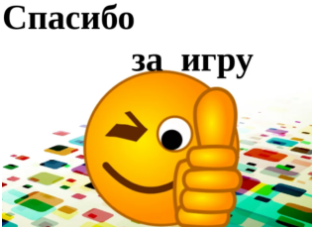